In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [27]:
%autosave 0
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import animation
import ipywidgets as widgets
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)

Autosave disabled


# Optimización

Es el proceso para:
- **(Prosa)** encontrar la mejor solución de un problema
- **(Matematicamente)** encontrar un valor extremo de una función

### Definiciones

- Función objetivo: Función continua que queremos optimizar, $f : \mathbb{R}^D \to \mathbb{R}$
    - Puede ser diferenciable
    - Puede ser convexa
- Valor extremo: Mínimo o máximo de la función objetivo, $ \max f(\vec x) \equiv \min - f(\vec x)$
    - Es suficiente hablar de minimización
- Un mínimo $x^*$ es tal que $f(x) > f(x^*)$ para $x \in \mathbb{S}$
    - Si $\mathbb{S}$ es igual al dominio de $f(x)$ entonces es un mínimo global
    - De lo contrario hablamos de un mínimo local
    - Una función convexa tiene sólo un mínimo
- La solución que buscamos podría estar sujeta a restricciones


### Problema general de optimización

Para una función $f : \mathbb{R}^D \to \mathbb{R}$
$$
\min_x f(x) ~ \text{s.a.} ~g(x) = 0, h(x) \leq 0,
$$
donde $g : \mathbb{R}^D \to \mathbb{R}^G$ y $h : \mathbb{R}^D \to \mathbb{R}^H$

#### Clasificación de problemas de optimización

- Una variable versus multi-variable
- Ecuaciones lineales o no-lineales (convexo o no convexo)
- Sin/con restricciones (sin/con desigualdades)

Mínimos cuadrados: Multi-variable, lineal, sin restricciones



### ¿Cómo encontrar el mínimo de una función continua sin restricciones?

Encontrar las raices (ceros) de la derivada/gradiente de $f$

$$
\nabla f (\theta^*) = \begin{pmatrix} \frac{\partial f}{\partial \theta_1}, \frac{\partial f}{\partial \theta_2}, \ldots, \frac{\partial f}{\partial \theta_D} \end{pmatrix} = \vec 0
$$

Las soluciones se conocen como puntos estacionarios de $f$

Luego si las segunda derivada/Hessiano de $f$

$$
H_{ij}^f (\theta^*)  = \frac{\partial^2 f}{\partial \theta_i \partial \theta_j} (\theta^*)
$$

es positiva/semi-definida positiva  entonces $\theta^*$ es un **mínimo local**


Receta
1. Obtener $\theta^*$ tal que $\nabla f (\theta^*)=0$
1. Probar que es un mínimo el Hessiano

##### Problema: Sólo sirve si podemos obtener una expresión análitica de $\theta$ a partir de $\nabla f (\theta^*)=0$

## Ejemplo: Regresión con elemento no-lineal

- Sea un conjunto de $M=100$ datos que corresponden a dos categorías, $y_i \in \{0, 1\}$
- Los datos son bidimensionales, $x_i \in \mathbb{R}^2$
- Para mapear los datos a la categoría pasar un **hiperplano** a través de  una **función no-lineal**

$$
\sigma \left ( \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} \right) \approx y_i ~ \forall i=1,\ldots,100
$$
por ejemplo
$$
\sigma(z) = \frac{1}{1 + e^{-x}} \in [0, 1],
$$
que se conoce como función sigmoide

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
z = np.linspace(-6, 6, num=100)
ax.plot(z, 1/(1+np.exp(-z)));

Luego podemos intentar ajustar 

$$
\min_\theta \sum_{i=1}^M \left(y_i - \sigma \left ( \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} \right)\right)^2
$$

Pero: 
- Ya no es lineal en sus parámetros
- No podremos despejar en función de $\theta$
- No hay solución análitica como en mínimos cuadrados lineal

<IPython.core.display.Javascript object>


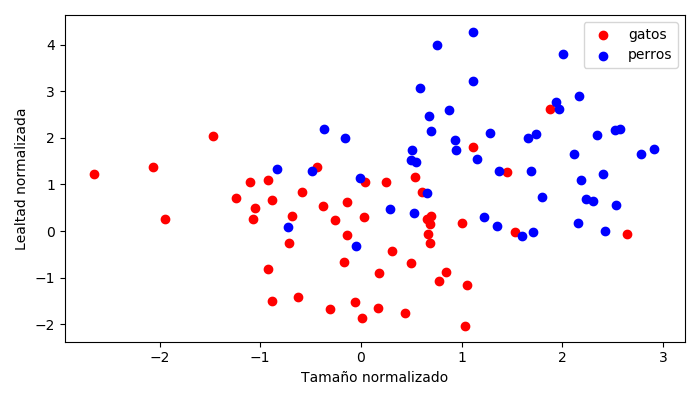

In [16]:
N = 100
X = np.concatenate((np.random.randn(N//2, 2), 1.5+np.random.randn(N//2, 2)), axis=0)
Y = np.concatenate((np.zeros(shape=(N//2, 1)), np.ones(shape=(N//2, 1))), axis=0)[:, 0]
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='gatos')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label='perros')
ax.set_ylabel('Lealtad normalizada')
ax.set_xlabel('Tamaño normalizado')
plt.legend();

# Búsqueda exhaustiva de la mejor solución

También conocido como "método de fuerza bruta"
1. Definimos una grilla para nuestro espacio de parámetros (dominio y resolución)
1. Para cada elemento de la grilla calculamos la función de costo
1. Buscamos el elemento con menor función de costo

Ventaja: Si la resolución es lo suficientemente fina podemos encontrar el mínimo global del dominio

Desventaja: Costo computacional, explosión combinatorial


Sea un modelo de $10$ parámetros con una resolución de $1000$ puntos cada uno: $1000^{10}$ evaluaciones de $f()$

In [55]:
%%time
def f(theta0, theta1, theta2):
    model = theta0 + theta1*X[:, 0] + theta2*X[:, 1]
    sig = 1./(1. + np.exp(-model))
    return np.mean((Y-sig)**2)

theta0 = np.linspace(-10, 10, num=10)
theta1 = np.linspace(-10, 10, num=10)
theta2 = np.linspace(-10, 10, num=10)

mse_plot = np.zeros(shape=(len(theta0), len(theta1), len(theta2)))
for k, t0_ in enumerate(theta0):
    for i, t1_ in enumerate(theta1):
        for j, t2_ in enumerate(theta2):
            mse_plot[k, i, j] = f(t0_, t1_, t2_)

CPU times: user 15.2 ms, sys: 0 ns, total: 15.2 ms
Wall time: 14.6 ms


<IPython.core.display.Javascript object>


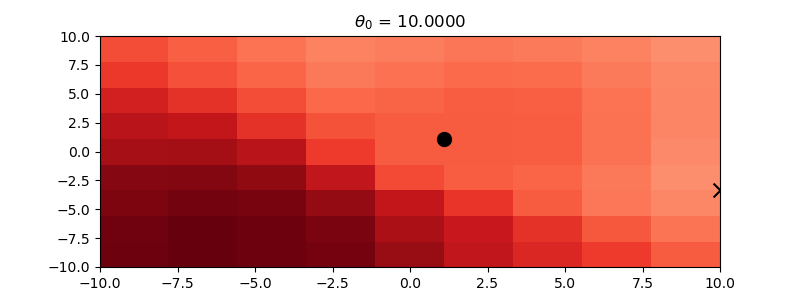

-1.1111111111111107

1.1111111111111107

1.1111111111111107

In [57]:
fig, ax = plt.subplots(figsize=(8, 3))
T1, T2 = np.meshgrid(theta1, theta2)
idx_all = np.unravel_index(np.argmin(mse_plot), mse_plot.shape)

def update_plot(idx):
    ax.cla()
    ax.set_title(r"$\theta_0$ = {0:0.4f}".format(theta0[idx]))
    cf = ax.pcolormesh(T1, T2, mse_plot[idx, :, :], cmap=plt.cm.Reds,
                     vmin=np.amin(mse_plot), vmax=np.amax(mse_plot))
    idx = np.unravel_index(np.argmin(mse_plot[idx, :, :]), mse_plot[0, :, :].shape)
    ax.scatter(theta1[idx[1]], theta2[idx[0]], s=100, c='k', marker='x');
    ax.scatter(theta1[idx_all[2]], theta2[idx_all[1]], s=100, c='k');
    ax.set_xlim((theta1[0], theta1[-1]))
    ax.set_ylim((theta2[0], theta2[-1]))

anim = animation.FuncAnimation(fig, update_plot, frames=len(theta0), 
                               interval=5000/len(theta0), repeat=False, blit=True)

display(theta0[idx_all[0]], theta1[idx_all[1]], theta2[idx_all[2]])

# Método iterativos: Newton


- Acercarse a la mejor solución paso a paso
- Encontrar en cada instante la mejor dirección

Sea el valor actual del vector de parámetros $\theta_t$

Queremos encontrar el mejor "próximo valor" según nuestra función objetivo
$$
\theta_{t+1} = \theta_t + \Delta \theta
$$
Consideremos la aproximación de Taylor de segundo orden de $f$
$$
f(\theta_{t} + \Delta \theta) \approx f(\theta_t) + \nabla f (\theta_t) \Delta \theta + \frac{1}{2} \Delta \theta^T H_f (\theta_t) \Delta \theta 
$$
Derivando en función de $\Delta \theta$ e igualando a cero tenemos
$$
\begin{align}
\nabla f (\theta_t)  +  H_f (\theta_t) \Delta \theta &= 0 \nonumber \\
\Delta \theta &= - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\theta_{t+1} &= \theta_{t} - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\end{align}
$$

- Se obtiene una regla iterativa en función del **Gradiente** y del **Hessiano**
- La solución depende de $\theta_0$
- "Asumimos" que la aproximación de segundo orden es "buena"
- Si nuestro modelo tiene $N$ parámetros el Hessiano es de $N\times N$, ¿Qué pasa si $N$ es grande?

# Gradiente descendente

Si el Hessiano es prohibitivo podemos usar una aproximación de primer orden

El método más clásico es el **gradiente descendente**
$$
\theta_{t+1} = \theta_{t} - \eta \nabla f (\theta_t)
$$

donde hemos reemplazado el Hessiano por una constante $\eta$ llamado "paso" o "tasa de aprendizaje"

In [ ]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)
x = np.linspace(-4, 6, num=100)
f = lambda theta : (theta-1.)**2 #+ 10*np.sin(theta)
df = lambda theta : 2*(theta -1.) #+ 10*np.cos(theta)
df2 = lambda theta : 2 #- 10*np.cos(theta)

t = 10*np.random.rand(10) - 4.
ax[0].plot(x, f(x))
sc = ax[0].scatter(t, L(t), s=100)

ax[1].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$f(\theta)$')
ax[1].plot(x, -df(x))
ax[1].set_ylabel(r'- f(\theta)$')
eta = 0.01

def update(n):
    t = sc.get_offsets()[:, 0]
    t -= eta*df(t)
    #t -= df(t)/(df2(t)+10)
    sc.set_offsets(np.c_[t, f(t)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)

## Regresión con elemento no lineal usando gradiente descendente

- Calcule el gradiente de la función de costo en función de los parámetros
- Pruebe distintos valores de $\eta$ y estudie lo que ocurre con la solución

In [ ]:
theta0, theta1, theta2 = np.random.randn(3).T
sigmoid = lambda z: 1./(1+np.exp(-z))
eta = 2e-2
mse_plot = np.zeros(shape=(500,))
for t in range(len(mse_plot)):
    model = theta0 + theta1*X[:, 0] + theta2*X[:, 1]
    tmp = -2*(Y - sigmoid(model))*(1 - sigmoid(model))
    theta0 -= eta*np.sum(tmp)
    theta1 -= eta*np.sum(tmp*X[:, 0])
    theta2 -= eta*np.sum(tmp*X[:, 1])
    mse_plot[t] = np.sum((Y - sigmoid(model))**2)
    if t % 50 == 0:
        print(t, theta0, theta1, theta2, mse_plot[t])

y_hat = sigmoid(theta0 + theta1*X[:, 0] + theta2*X[:, 1])

fig, ax = plt.subplots(2, figsize=(7, 5), tight_layout=True)
ax[1].scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', label='perros')
ax[1].scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', label='gatos')
x_lim, y_lim = ax[1].get_xlim(), ax[1].get_ylim()
x = np.linspace(x_lim[0], x_lim[1], num=100)
y = np.linspace(y_lim[0], y_lim[1], num=100)
X_plot, Y_plot = np.meshgrid(x, y)
C = sigmoid(theta0 + theta1*X_plot + theta2*Y_plot)
cf = ax[1].contourf(X_plot, Y_plot, C, zorder=-100, cmap=plt.cm.RdBu_r)
plt.colorbar(cf, ax=ax[1])
plt.legend();
ax[0].plot(mse_plot);

# Modulo [`scipy.optimize`](https://docs.scipy.org/doc/scipy-1.3.0/reference/tutorial/optimize.html)

La función [`minimize`](https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) engloba una batería de optimizadores 

In [ ]:
import scipy.optimize

theta0, theta1, theta2 = np.random.randn(3).T
sigmoid = lambda z: 1/(1+np.exp(-z))

def f(theta):
    model = theta[0] + theta[1]*X[:, 0] + theta[2]*X[:, 1]
    return np.sum((Y - sigmoid(model))**2)

theta0 = np.random.randn(3)
res = scipy.optimize.minimize(f, theta0, method='BFGS', options={'disp': True})
display(res)

In [ ]:
theta = res.x
y_hat = sigmoid(theta[0] + theta[1]*X[:, 0] + theta[2]*X[:, 1])
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(X[Y==0, 0], X[Y==0, 1], c=y_hat[Y==0], 
           marker='x', label='perros', vmin=0, vmax=1, cmap=plt.cm.RdBu_r)
ax.scatter(X[Y==1, 0], X[Y==1, 1], c=y_hat[Y==1], 
           marker='o', label='gatos', vmin=0, vmax=1, cmap=plt.cm.RdBu_r)
plt.legend();

### Apéndices

https://www.cs.toronto.edu/~frossard/post/linear_regression/

https://mmas.github.io/least-squares-fitting-numpy-scipy

https://sbu-python-class.github.io/python-science/

https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-2-dceff1a12a12

http://fa.bianp.net/blog/2013/numerical-optimizers-for-logistic-regression/

http://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09D_Optimization_Examples.html

http://learningwithdata.com/logistic-regression-and-optimization.html